In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
df = pd.read_csv('/Users/SamWarwick/Downloads/winemag-data-130k-v2.csv')
df.shape

(129971, 14)

In [6]:
df.head(10)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
df.info

<bound method DataFrame.info of             id   country                                        description  \
0            0     Italy  Aromas include tropical fruit, broom, brimston...   
1            1  Portugal  This is ripe and fruity, a wine that is smooth...   
2            2        US  Tart and snappy, the flavors of lime flesh and...   
3            3        US  Pineapple rind, lemon pith and orange blossom ...   
4            4        US  Much like the regular bottling from 2012, this...   
...        ...       ...                                                ...   
129966  129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967  129967        US  Citation is given as much as a decade of bottl...   
129968  129968    France  Well-drained gravel soil gives this wine its c...   
129969  129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970  129970    France  Big, rich and off-dry, this is powered by inte...   

                   

In [5]:
df.describe()

,id,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


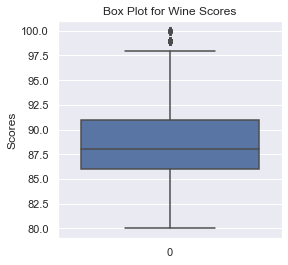

In [14]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=df['points'], ax=ax)    
ax.set_title(f"Box Plot for Wine Scores")
ax.set_ylabel("Scores")
plt.show()

In [22]:
##Looking for outliers

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['points'].quantile(0.25)
Q3 = df['points'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find potential outliers
outliers = df[(df['points'] < lower_bound) | (df['points'] > upper_bound)]
outlier_pts = outliers['points']

# Display the potential outliers
print("Potential outliers:")
print(outlier_pts.count())

Potential outliers:
52


In [26]:
## Drop outliers from datafram

df_outliers_removed = df.drop(outliers.index)

df_outliers_removed.shape
## We see that 52 rows have been removed from our dataframe, as expected based on the 52 outliers

(129919, 14)

In [28]:
##

result_list = []

for column in df_outliers_removed.columns:
    uniqueVals = df_outliers_removed[column].unique()
    if len(uniqueVals) == len(df_outliers_removed):
        result_list.append("Column: " + column + " has a unique value for each row in the dataset")
    else:
        result_list.append(column + " does not have a unique value for each row -- do not remove")

result_list.sort()

for result in result_list:
    print(result)

Column: id has a unique value for each row in the dataset
country does not have a unique value for each row -- do not remove
description does not have a unique value for each row -- do not remove
designation does not have a unique value for each row -- do not remove
points does not have a unique value for each row -- do not remove
price does not have a unique value for each row -- do not remove
province does not have a unique value for each row -- do not remove
region_1 does not have a unique value for each row -- do not remove
region_2 does not have a unique value for each row -- do not remove
taster_name does not have a unique value for each row -- do not remove
taster_twitter_handle does not have a unique value for each row -- do not remove
title does not have a unique value for each row -- do not remove
variety does not have a unique value for each row -- do not remove
winery does not have a unique value for each row -- do not remove


In [29]:
## ID is irrelevant to prediction, we will drop it

df_outliers_removed.drop('id', axis = 1, inplace =T rue)

In [30]:
df = df_outliers_removed

In [32]:
df.drop('taster_twitter_handle', axis = 1, inplace = True)

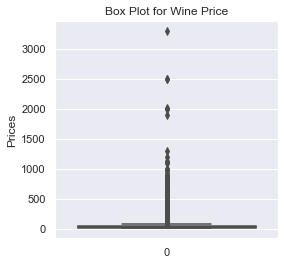

In [34]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=df['price'], ax=ax)    
ax.set_title(f"Box Plot for Wine Price")
ax.set_ylabel("Prices")
plt.show()

In [35]:
## Also want to remove outliers for price as this will be used as a predictor value of score

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find potential outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outlier_price = outliers['price']

# Display the potential outliers
print("Potential outliers:")
print(outlier_price.count())



Potential outliers:
7198


In [36]:
df_outliers_removed = df.drop(outliers.index)

In [39]:
df = df_outliers_removed

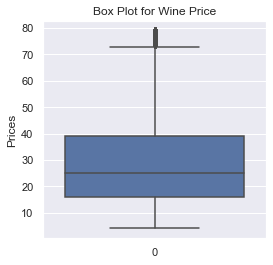

In [40]:
## Plotting again with outliers removed

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=df['price'], ax=ax)    
ax.set_title(f"Box Plot for Wine Price")
ax.set_ylabel("Prices")
plt.show()

## That looks better

In [41]:
## Since I will not be conducting any language analysis, I will remove the 'description' feature. 
## This could be another project

df.drop('description', axis = 1, inplace = True)


In [43]:
## Cleaning nulls

df.isnull().values.sum()

165559

In [44]:
## Thats a lot

df.isnull().sum() 

country           63
designation    36289
points             0
price           8991
province          63
region_1       20607
region_2       74861
taster_name    24684
title              0
variety            1
winery             0
dtype: int64

In [45]:
## I want to preserve as many as rows as I can, so I will drop column region_2 as region_1 should be sufficient, then I will remove nulls

df.drop('region_2', axis = 1, inplace = True)

In [49]:
df.isnull().sum() 

country           63
designation    36289
points             0
price           8991
province          63
region_1       20607
taster_name    24684
title              0
variety            1
winery             0
dtype: int64

In [50]:
## Now we can drop nulls

df.dropna(inplace=True)

In [51]:
df.isnull().sum() 

## It worked!

country        0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

In [52]:
df.shape
#We still have nearly 50,000 records left; well done! This should be more than enough to create an accurate model

(49988, 10)

In [53]:
## Data transformation time

non_numeric_features = df.select_dtypes(exclude = np.number).columns.tolist()
print(non_numeric_features)

['country', 'designation', 'province', 'region_1', 'taster_name', 'title', 'variety', 'winery']


In [64]:
# Create a copy of the DataFrame to store the mapped values
df_mapped = df.copy()

# Iterate through each non-numeric feature column
for column in non_numeric_features:
    # Use the factorize() function to assign numeric values to the unique values in the column
    df_mapped[column] = pd.factorize(df[column])[0]

# Display the DataFrame with mapped values
df_mapped.head(10)

df = df_mapped
df.head(10)

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
3,0,0,87,13.0,0,0,0,0,0,0
4,0,1,87,65.0,1,1,1,1,1,1
5,1,2,87,15.0,2,2,2,2,2,2
6,2,3,87,16.0,3,3,3,3,3,3
9,3,4,87,27.0,4,4,4,4,4,4
10,0,5,87,19.0,5,5,5,5,5,5
16,4,6,87,30.0,6,6,2,6,6,6
17,4,7,87,13.0,7,7,2,7,6,7
18,1,8,87,28.0,2,8,2,8,7,8
20,0,9,87,23.0,8,9,0,9,8,9


In [68]:
## Lets just check that worked 

df['country'].value_counts()

## Seems to have worked, we can check others

0    24371
3    10413
2     6205
1     4886
4     2676
5     1277
6      160
Name: country, dtype: int64

In [69]:
df['taster_name'].value_counts()

4     8199
2     7660
1     6159
3     6068
5     5859
6     4372
7     3233
10    2583
8     2069
9     1702
11    1137
13     426
0      254
12     162
14      96
16       7
15       2
Name: taster_name, dtype: int64

In [71]:
## Model time

Y = df.iloc[:, df.columns.get_loc('points')]
X = df.loc[:, df.columns != 'points']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [72]:
print(X_train)

        country  designation  price  province  region_1  taster_name  title  \
49886         3        11343   60.0        13        21            4  18368   
26436         0         6818   45.0         1         1            1   9874   
111517        0        19997   20.0        18        34            9  39210   
36158         0         4728   26.0         5        22            6  13415   
44798         0        10426   50.0         5        11            6  16563   
...         ...          ...    ...       ...       ...          ...    ...   
55774         2        12289   22.0        11       389            3  20381   
119399        2        20924   25.0         3        10            3  41723   
110830        2        10604   38.0         3        89            3  16900   
113522        3        17833   14.0        20        46            4  39797   
7267          0           56   29.0         5       117           10   2717   

        variety  winery  
49886        16    4373  

In [73]:
print(Y_train)

49886     90
26436     94
111517    85
36158     92
44798     88
          ..
55774     85
119399    86
110830    92
113522    90
7267      89
Name: points, Length: 39990, dtype: int64


In [74]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [75]:
Y_pred = lr.predict(X_test)

In [76]:
print(Y_pred)

[92.7050604  89.59795723 86.76848571 ... 86.97051214 88.43121662
 88.53761334]


In [77]:
print(metrics.r2_score(Y_test, Y_pred))

## The model is ok

0.3047824510036411


Text(0, 0.5, 'Predicted')

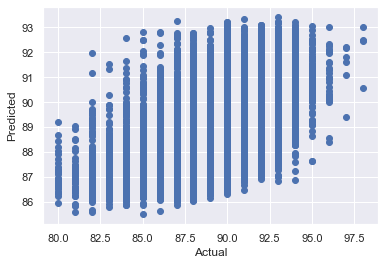

In [78]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

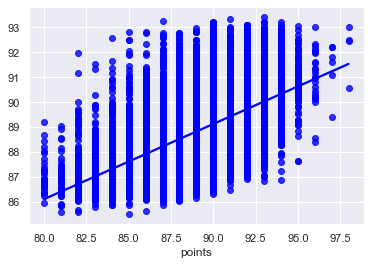

In [79]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='blue');

In [83]:
## It's not that good!
intercept = lr.intercept_
print(intercept)

85.7097274321623


In [84]:
coef = lr.coef_
print(coef)

[-1.43020988e-02 -3.22145668e-06  9.03341997e-02 -5.48744139e-03
 -1.79460885e-04  7.55551194e-02  6.20196155e-06  2.86935727e-04
 -1.07065166e-04]


In [93]:
# Get the feature names from the DataFrame columns (excluding the target variable)
feature_names = df.drop('points', axis=1).columns.tolist()

# Initialize an empty list to store the formula terms
formula_terms = []

# Add the intercept term
formula_terms.append(f"{intercept:.2f}")

# Add the terms for each coefficient and feature
for i, coefficient in enumerate(coef):
    if coefficient >= 0:
        formula_terms.append(f"+ {coefficient:.2f} * {feature_names[i]}")
    else:
        formula_terms.append(f"- {abs(coefficient):.2f} * {feature_names[i]}")

# Join the formula terms to create the complete formula
formula = " ".join(formula_terms)

# Print the multiple linear regression formula with the target variable 'price'
print("Multiple Linear Regression Formula:")
print("points =", formula)

Multiple Linear Regression Formula:
points = 85.71 - 0.01 * country - 0.00 * designation + 0.09 * price - 0.01 * province - 0.00 * region_1 + 0.08 * taster_name + 0.00 * title + 0.00 * variety - 0.00 * winery


In [97]:
## Obviously this model is not very useful, so lets see if we can improve it
drop_cols = ['designation', 'taster_name', 'title']
df_new = df.drop(columns=drop_cols)

In [98]:
## Test test
df.head(10)

,country,points,price,province,region_1,variety,winery
3,0,87,13.0,0,0,0,0
4,0,87,65.0,1,1,1,1
5,1,87,15.0,2,2,2,2
6,2,87,16.0,3,3,3,3
9,3,87,27.0,4,4,4,4
10,0,87,19.0,5,5,5,5
16,4,87,30.0,6,6,6,6
17,4,87,13.0,7,7,6,7
18,1,87,28.0,2,8,7,8
20,0,87,23.0,8,9,8,9


In [100]:
## mlg rd 2
Y = df_new.iloc[:, df_new.columns.get_loc('points')]
X = df_new.loc[:, df_new.columns != 'points']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [101]:
print(X_train)

        country  price  province  region_1  variety  winery
49886         3   60.0        13        21       16    4373
26436         0   45.0         1         1        1     382
111517        0   20.0        18        34        0      42
36158         0   26.0         5        22      313    1756
44798         0   50.0         5        11       24    1590
...         ...    ...       ...       ...      ...     ...
55774         2   22.0        11       389       67    2923
119399        2   25.0         3        10       11    5744
110830        2   38.0         3        89        8    3359
113522        3   14.0        20        46      302     431
7267          0   29.0         5       117       20    1034

[39990 rows x 6 columns]


In [102]:
print(Y_train)

49886     90
26436     94
111517    85
36158     92
44798     88
          ..
55774     85
119399    86
110830    92
113522    90
7267      89
Name: points, Length: 39990, dtype: int64


In [103]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [104]:
Y_pred = lr.predict(X_test)

In [105]:
print(metrics.r2_score(Y_test, Y_pred))

0.2981758378392977


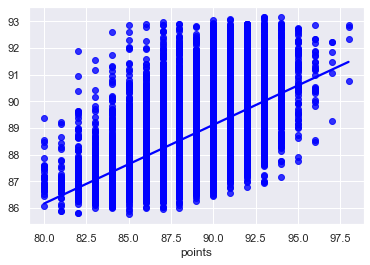

In [106]:
## The model has gotten worse...

sns.regplot(x=Y_test,y=Y_pred,ci=None,color='blue');

In [107]:
intercept = lr.intercept_
print(intercept)

86.1826686917148


In [108]:
coef = lr.coef_
print(coef)

[-3.01977918e-02  9.00712969e-02 -4.09983841e-03 -1.24812411e-04
 -5.38308179e-05 -1.05699154e-04]


In [110]:
# Get the feature names from the DataFrame columns (excluding the target variable)
feature_names = df_new.drop('points', axis=1).columns.tolist()

# Initialize an empty list to store the formula terms
formula_terms = []

# Add the intercept term
formula_terms.append(f"{intercept:.2f}")

# Add the terms for each coefficient and feature
for i, coefficient in enumerate(coef):
    if coefficient >= 0:
        formula_terms.append(f"+ {coefficient:.2f} * {feature_names[i]}")
    else:
        formula_terms.append(f"- {abs(coefficient):.2f} * {feature_names[i]}")

# Join the formula terms to create the complete formula
formula = " ".join(formula_terms)

# Print the multiple linear regression formula with the target variable 'price'
print("Multiple Linear Regression Formula:")
print("points =", formula)

Multiple Linear Regression Formula:
points = 86.18 - 0.03 * country + 0.09 * price - 0.00 * province - 0.00 * region_1 - 0.00 * variety - 0.00 * winery
